In [94]:
# EDA packages
import pandas as pd
import numpy as np

In [95]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 


In [96]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [97]:
# load our dataset
df = pd.read_csv("heart.csv")

In [98]:
df.head()

,age,sex,cp,oldpeak,ca,target
0,63,1,3,2.3,0,1
1,37,1,2,3.5,0,1
2,41,0,1,1.4,0,1
3,56,1,1,0.8,0,1
4,57,0,0,0.6,0,1


In [99]:
df.describe()

,age,sex,cp,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,1.039604,0.729373,0.544554
std,9.082101,0.466011,1.032052,1.161075,1.022606,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,0.800000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,1.600000,1.000000,1.000000
max,77.000000,1.000000,3.000000,6.200000,4.000000,1.000000


In [100]:
# Check for missing values
df.isna().sum()

age        0
sex        0
cp         0
oldpeak    0
ca         0
target     0
dtype: int64

In [101]:
df.shape

(303, 6)

In [102]:
# Species distribution
print(df.groupby('target').size())

target
0    138
1    165
dtype: int64


[0.25421145 0.07185345 0.22514012 0.2475842  0.20121078]


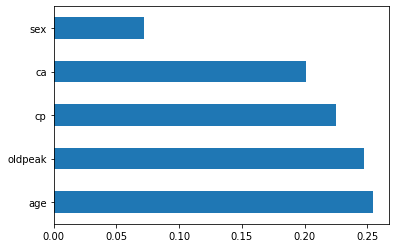

In [103]:
x = df.iloc[:,0:5]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [104]:
array = df.values
x = array[:,0:5]
y = array[:,-1]

In [105]:
#logit.predict(ex1)

In [106]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

# Train Test Split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression(random_state = 0)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

The accuracy of the Logistic Regression is 0.8524590163934426


array([[26,  3],
       [ 6, 26]], dtype=int64)

# Saving or Persisting Our Model
    Pickle
    Joblib

In [118]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
dataframe = pandas.read_csv("heart.csv")
array = dataframe.values
X = array[:,0:5]
Y = array[:,-1]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
var=model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(var, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
X

0.81


array([[63. ,  1. ,  3. ,  2.3,  0. ],
       [37. ,  1. ,  2. ,  3.5,  0. ],
       [41. ,  0. ,  1. ,  1.4,  0. ],
       ...,
       [68. ,  1. ,  0. ,  3.4,  2. ],
       [57. ,  1. ,  0. ,  1.2,  1. ],
       [57. ,  0. ,  1. ,  0. ,  1. ]])

In [119]:
from sklearn.externals import joblib
joblib.dump(var, 'logit_model_iris.pkl') 

['logit_model_iris.pkl']

In [120]:
# Reloading the Model
logit_model = joblib.load('logit_model_iris.pkl')

In [121]:
df.tail()

,age,sex,cp,oldpeak,ca,target
298,57,0,0,0.2,0,0
299,45,1,3,1.2,0,0
300,68,1,0,3.4,2,0
301,57,1,0,1.2,1,0
302,57,0,1,0.0,1,0


In [122]:
#ex2 = np.array([56,0,2,2.1,1.2,1.5]).reshape(1,-1)

In [123]:
#logit.fit(x_train,y_train)
#logit_model.predict(ex2)

In [115]:
    #print("accuracy :" , logit.score(x_test,y_test))